<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/FIDA_initial_plot_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Parsed TestReport-Binding_curve_1010_24(1).txt: 12 entries
Parsed TestReport-Binding_curve_110287(1).txt: 12 entries
Parsed TestReport-Binding_curve_150447.txt: 12 entries
Parsed TestReport-Binding_curve_164418(1).txt: 12 entries
Parsed TestReport-Binding_curve_215645(1).txt: 10 entries
Parsed TestReport-Binding_curve_21_10(1).txt: 10 entries
Parsed TestReport-Binding_curve_311379(1).txt: 11 entries
Parsed TestReport-Binding_curve_325188(1).txt: 11 entries
Parsed TestReport-Binding_curve_437645(1).txt: 12 entries
Parsed TestReport-Binding_curve_451607(1).txt: 12 entries
Parsed TestReport-Binding_curve_611457(1).txt: 11 entries
Parsed TestReport-Binding_curve_712433(1).txt: 11 entries
Parsed TestReport-Binding_curve_825176(1).txt: 12 entries
Parsed TestReport-Binding_curve_871244(1).txt: 11 entries
Parsed TestReport-Binding_curve_898214(1).txt: 11 entries
Pars

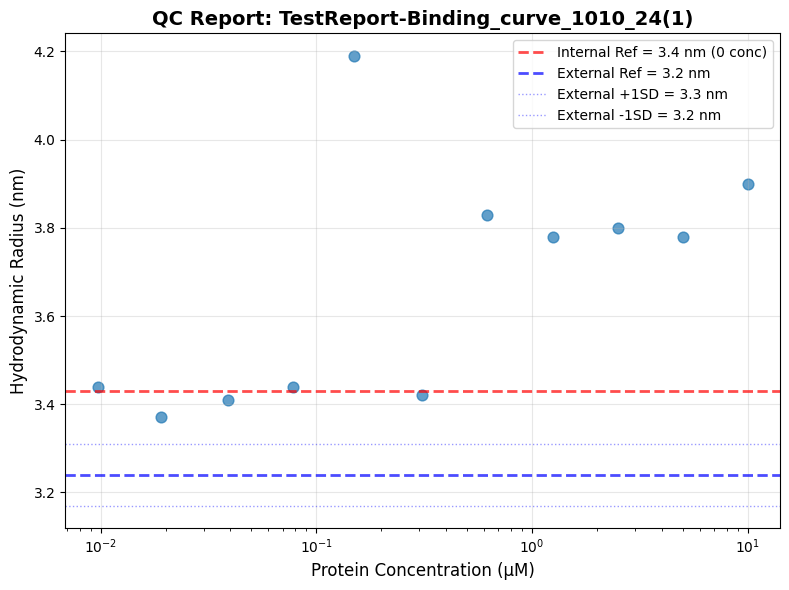

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_110287(1)_QC.png


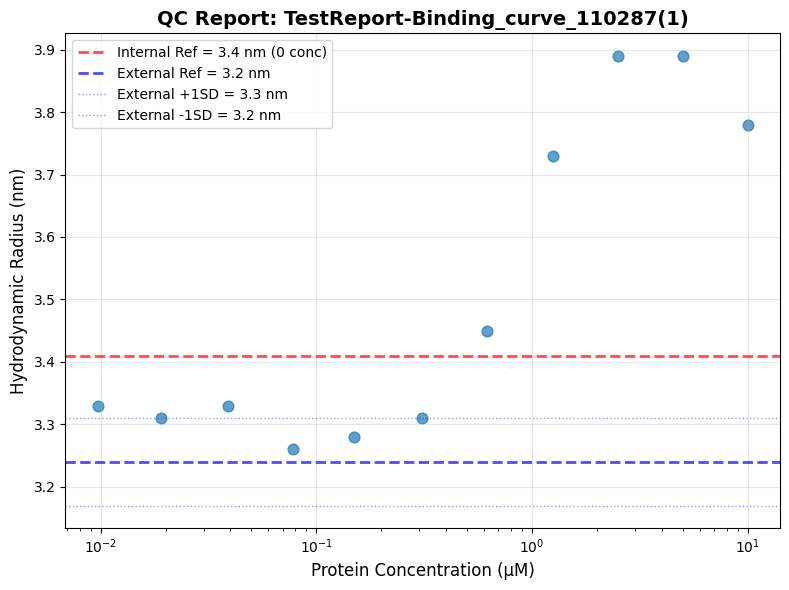

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_150447_QC.png


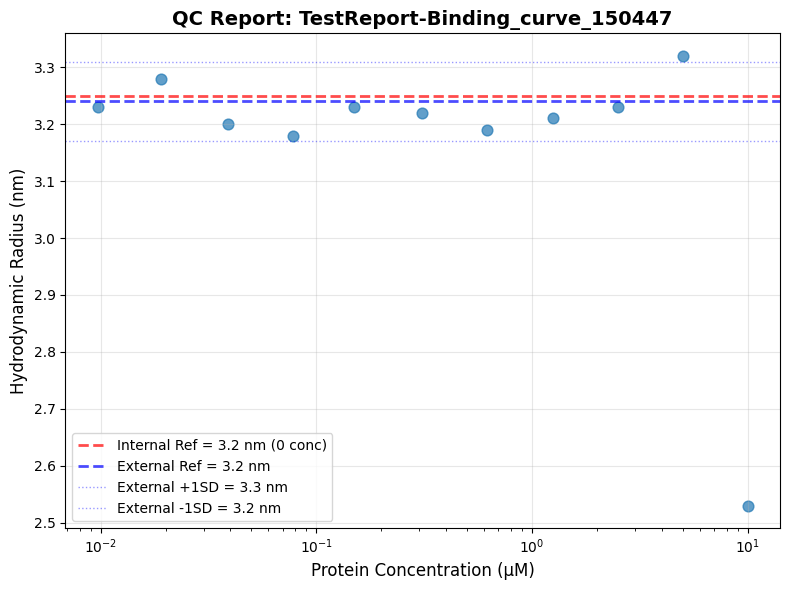

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_164418(1)_QC.png


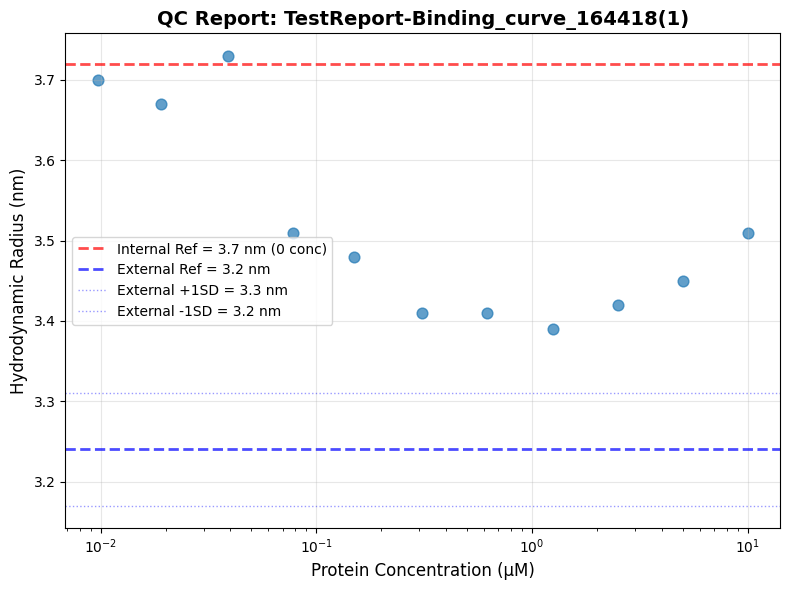

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_215645(1)_QC.png


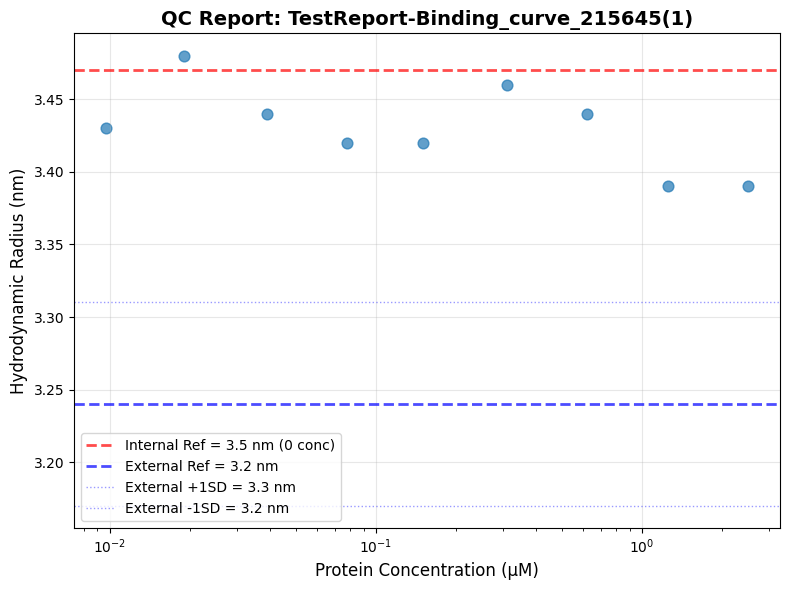

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_21_10(1)_QC.png


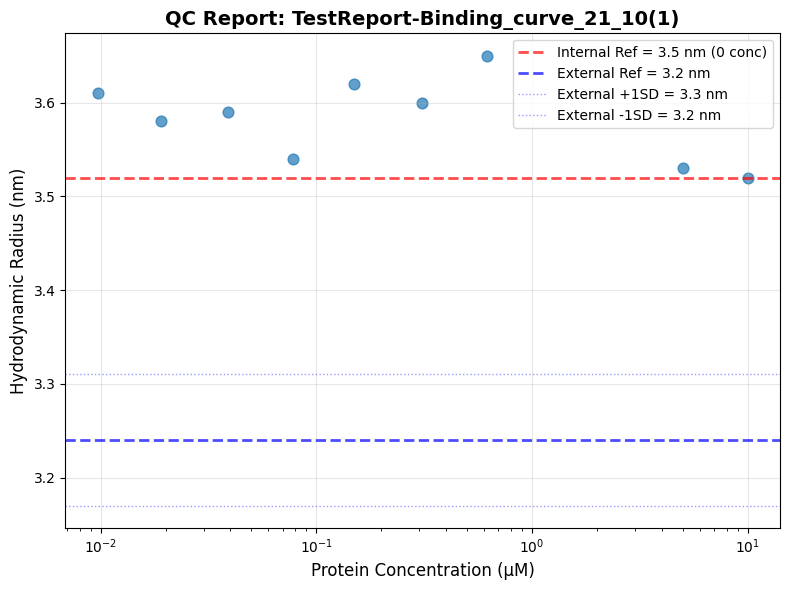

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_311379(1)_QC.png


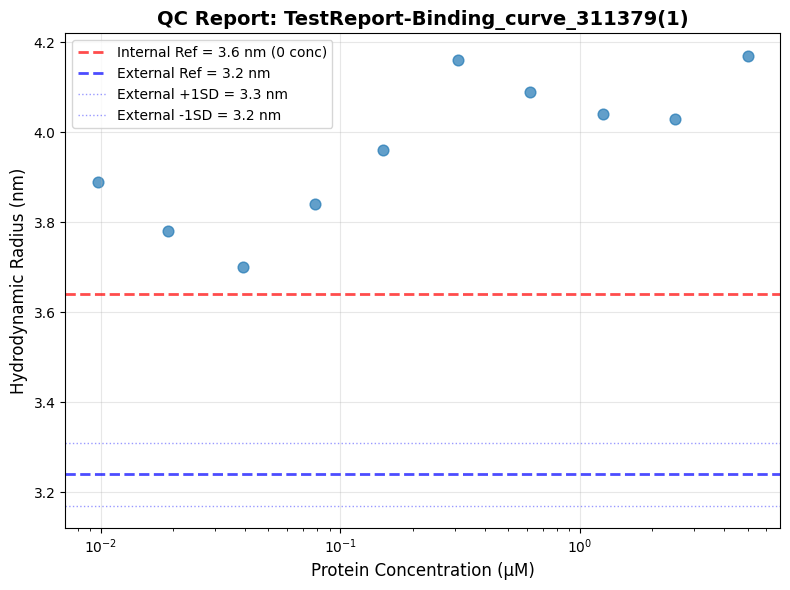

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_325188(1)_QC.png


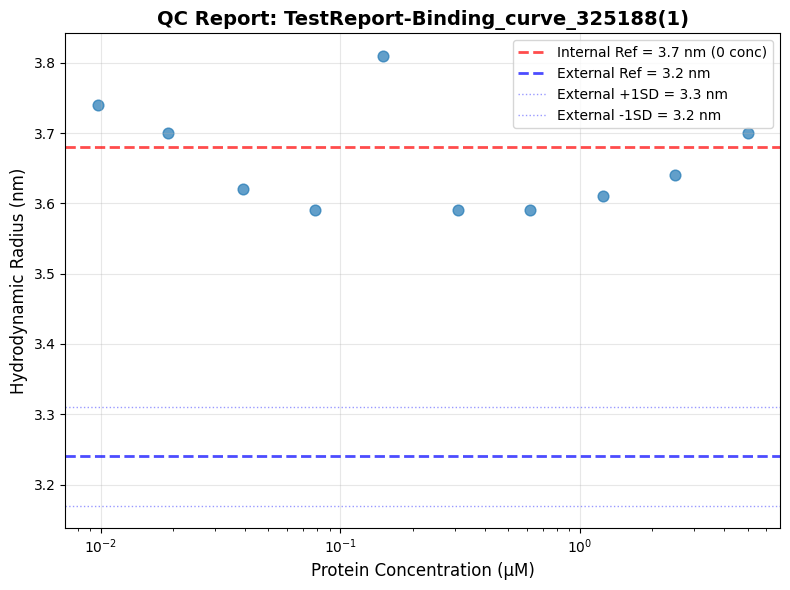

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_437645(1)_QC.png


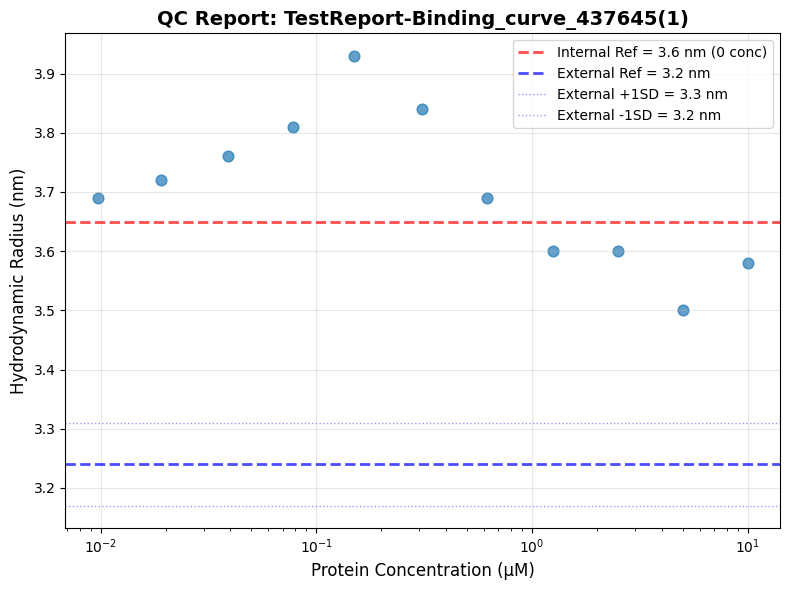

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_451607(1)_QC.png


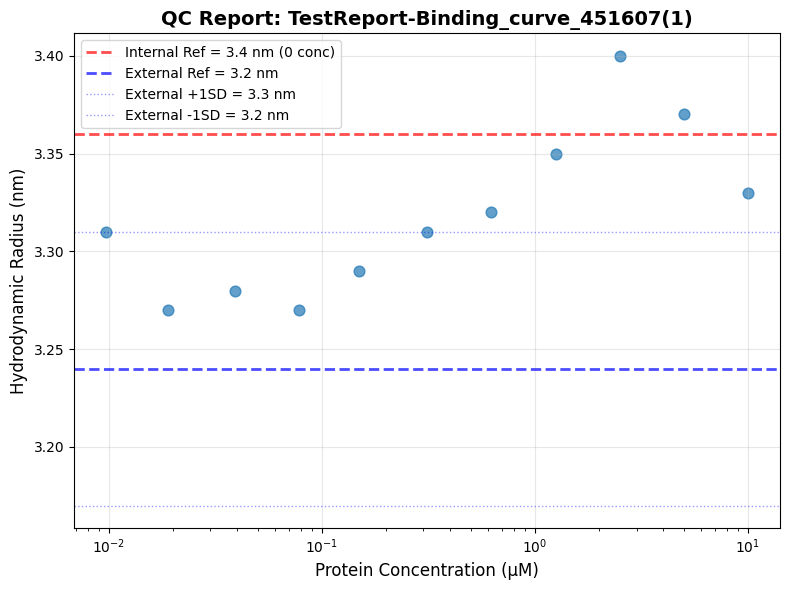

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_611457(1)_QC.png


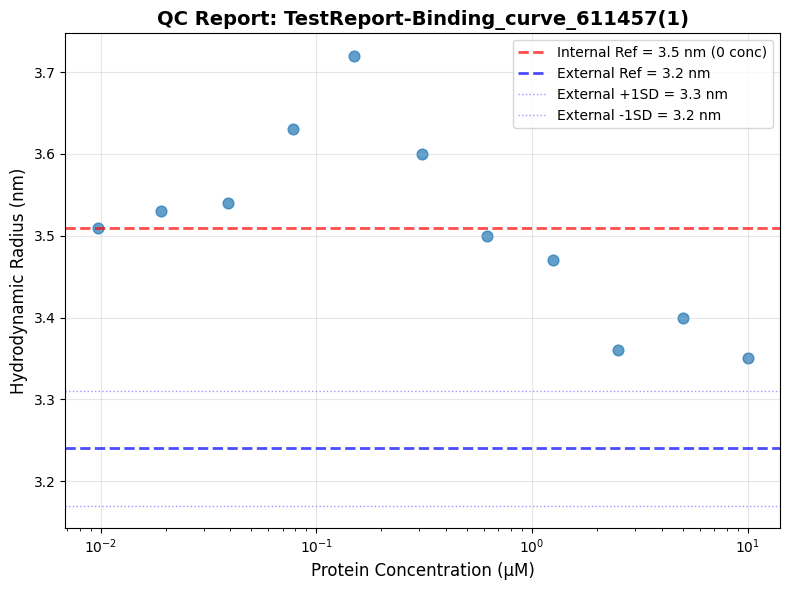

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_712433(1)_QC.png


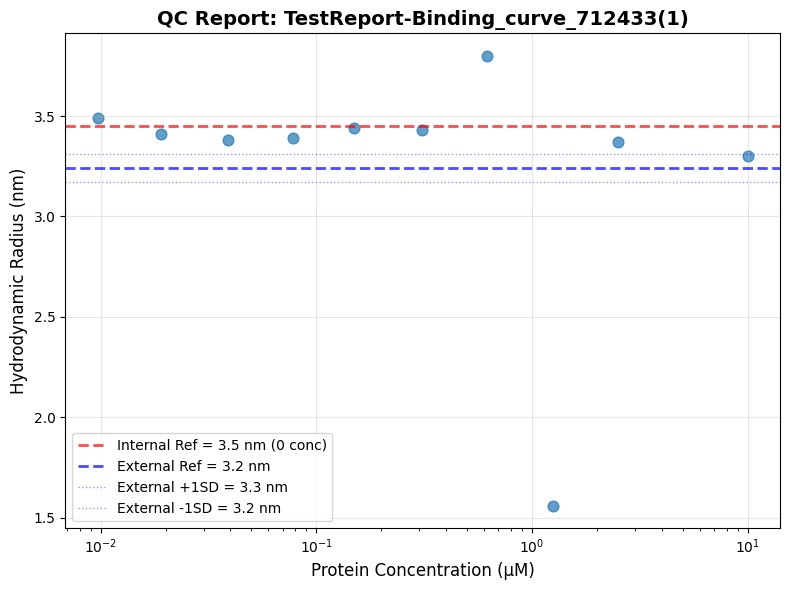

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_825176(1)_QC.png


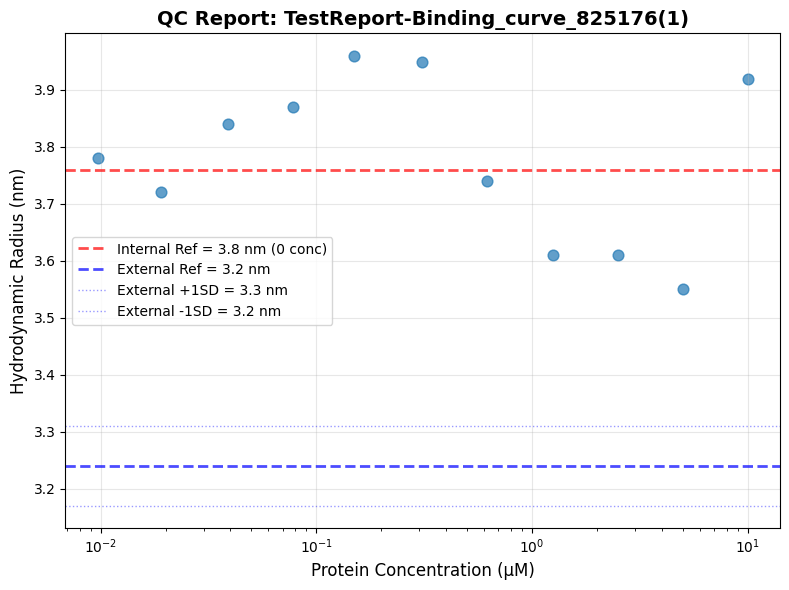

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_871244(1)_QC.png


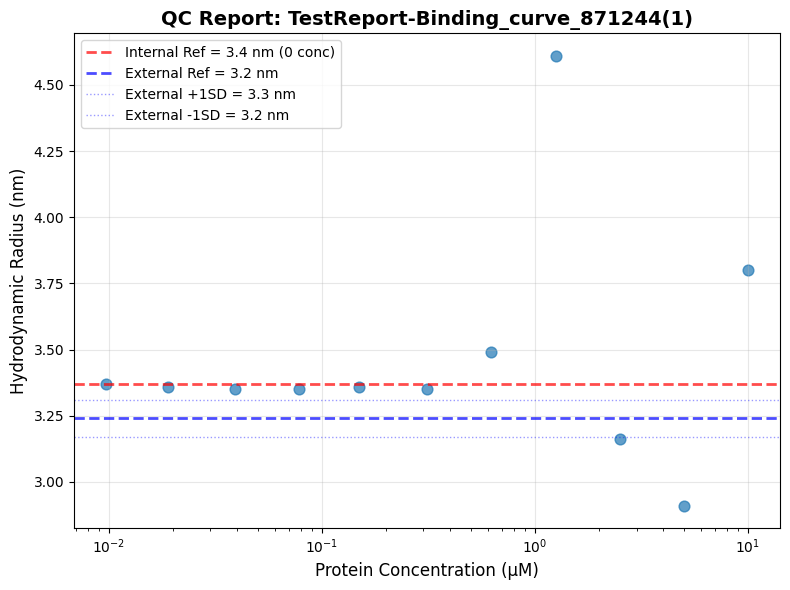

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_898214(1)_QC.png


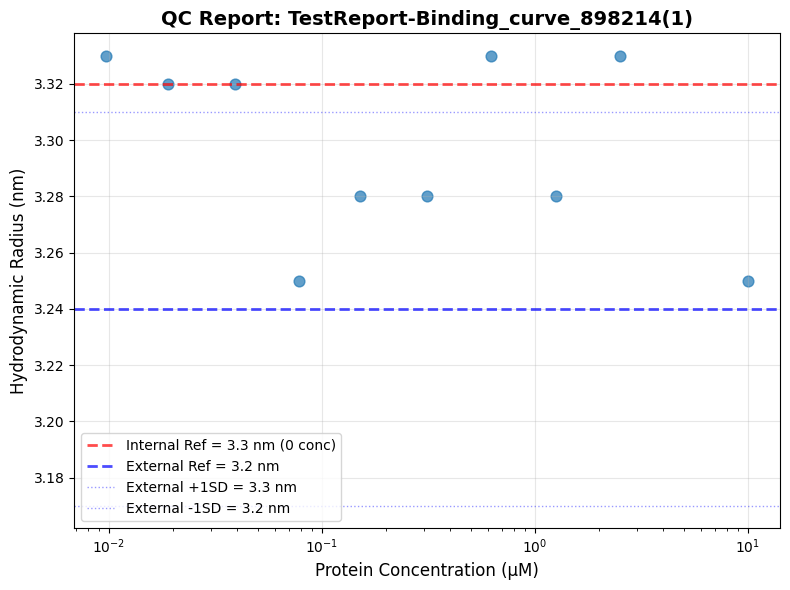

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_993298(1)_QC.png


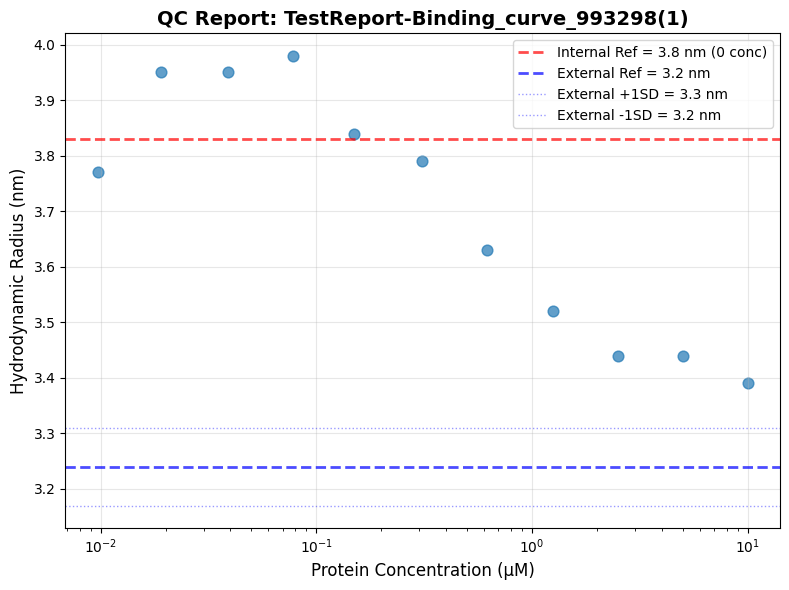

Individual plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots/TestReport-Binding_curve_99_65(1)_QC.png


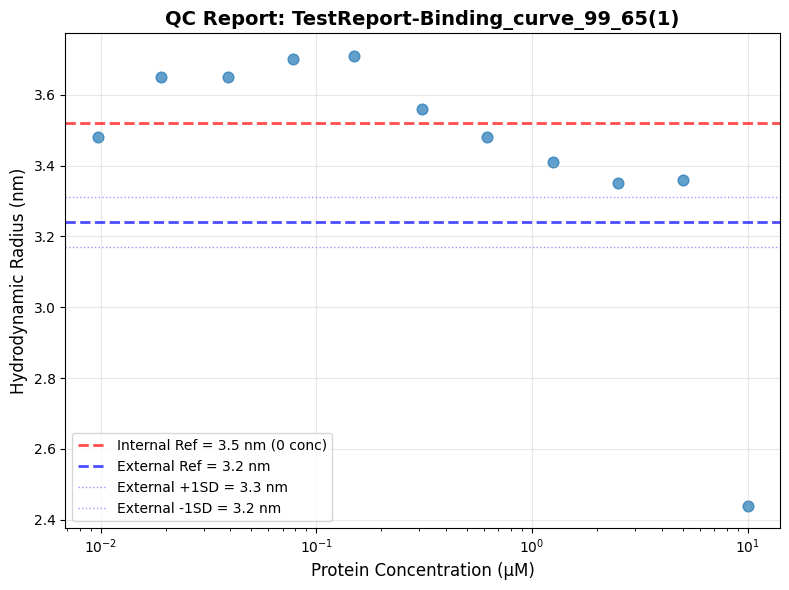


Generating combined plot...
Combined plot saved: /content/drive/MyDrive/FIDA/Shreya-July-25/QC_combined_plot.png


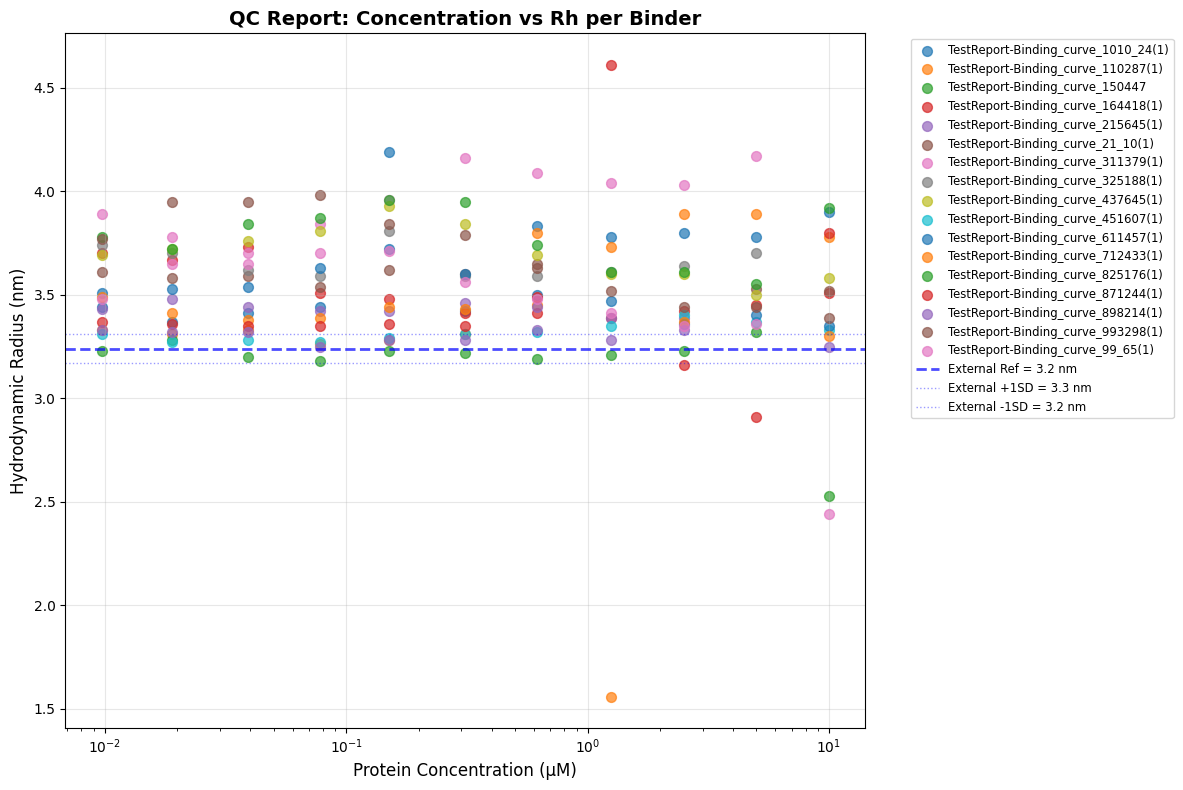


Analysis complete!
- Processed 17 binders
- Data saved to: /content/drive/MyDrive/FIDA/Shreya-July-25/QC_combined_pivot.csv
- Individual plots saved to: /content/drive/MyDrive/FIDA/Shreya-July-25/individual_plots
- Combined plot saved to: /content/drive/MyDrive/FIDA/Shreya-July-25/QC_combined_plot.png


In [15]:
from google.colab import drive
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')
directory = '/content/drive/MyDrive/FIDA/Shreya-July-25'

# Configuration parameters
PLOT_CONFIG = {
    'x_min': None,  # Set to a value like 0.01 to override auto scaling
    'x_max': None,  # Set to a value like 100 to override auto scaling
    'y_min': None,  # Set to a value like 0 to override auto scaling
    'y_max': None,  # Set to a value like 50 to override auto scaling
    'reference_line': True,  # Set to True to enable red reference line (single line, based on 0 concentration)
    'reference_rh': None,  # Set to a value to override auto detection, or None to use 0 concentration Rh
    'blue_reference_line': True,  # Set to True to enable blue reference lines (3 lines: central ± SD)
    'blue_reference_rh': 3.24,  # Central value for blue reference line
    'blue_reference_sd': 0.07,  # SD value for blue reference lines (creates ±1SD lines)
    'save_individual_plots': True,  # Set to False to skip individual plots
    'individual_plot_dir': 'individual_plots'  # Directory name for individual plots
}

def parse_concentration_from_brackets(text):
    match = re.search(r'\[(.*?)\]', str(text))
    if match:
        conc_str = match.group(1).strip()
        parts = conc_str.split()
        if len(parts) == 2:
            val, unit = parts
            try:
                val = float(val)
            except ValueError:
                return None
            if unit.lower() == 'nm':
                return val / 1000.0  # convert nM to µM
            elif unit.lower() in ['µm', 'um', 'umol', 'uM']:
                return val
            else:
                return val
    return None

def extract_qc_table(filepath):
    concs, rhs = [], []
    with open(filepath, 'r') as f:
        for line in f:
            if line.strip().startswith('[') and ']' in line:
                parts = line.strip().split('\t')
                if len(parts) < 3:
                    continue
                conc = parse_concentration_from_brackets(parts[0])
                try:
                    rh = float(parts[1])  # MS Rh [nm] S1
                except ValueError:
                    rh = None
                if conc is not None and rh is not None:
                    concs.append(conc)
                    rhs.append(rh)
    return concs, rhs

def apply_axis_limits(ax, config):
    """Apply custom axis limits if specified"""
    if config['x_min'] is not None or config['x_max'] is not None:
        current_xlim = ax.get_xlim()
        x_min = config['x_min'] if config['x_min'] is not None else current_xlim[0]
        x_max = config['x_max'] if config['x_max'] is not None else current_xlim[1]
        ax.set_xlim(x_min, x_max)

    if config['y_min'] is not None or config['y_max'] is not None:
        current_ylim = ax.get_ylim()
        y_min = config['y_min'] if config['y_min'] is not None else current_ylim[0]
        y_max = config['y_max'] if config['y_max'] is not None else current_ylim[1]
        ax.set_ylim(y_min, y_max)

def get_zero_concentration_rh(df_wide, binder):
    """Get the Rh value at the lowest concentration (closest to 0) for a binder"""
    mask = ~pd.isna(df_wide[binder])
    if not mask.any():
        return None

    # Find the minimum concentration where we have data for this binder
    min_conc_idx = df_wide.loc[mask, 'Concentration (µM)'].idxmin()
    return df_wide.loc[min_conc_idx, binder]

def add_reference_lines(ax, config, zero_conc_rh=None):
    """Add reference line(s) at specified Rh value"""

    # Red reference line (internal, single line only)
    if config['reference_line']:
        # Determine which Rh value to use for red line
        if config['reference_rh'] is not None:
            rh_value = config['reference_rh']
            label_suffix = "(manual)"
        elif zero_conc_rh is not None:
            rh_value = zero_conc_rh
            label_suffix = "(0 conc)"
        else:
            rh_value = None

        if rh_value is not None:
            # Single red reference line (no SD lines for internal reference)
            ax.axhline(y=rh_value, color='red', linestyle='--', alpha=0.7, linewidth=2,
                       label=f'Internal Ref = {rh_value:.1f} nm {label_suffix}')

    # Blue reference lines (external, central ± 1SD)
    if config['blue_reference_line']:
        blue_rh = config['blue_reference_rh']
        blue_sd = config['blue_reference_sd']

        # Central blue reference line (same weight as red)
        ax.axhline(y=blue_rh, color='blue', linestyle='--', alpha=0.7, linewidth=2,
                   label=f'External Ref = {blue_rh:.1f} nm')

        # Blue ±1SD lines (lighter weight) - always show if blue_reference_line is True
        if blue_sd is not None:
            ax.axhline(y=blue_rh + blue_sd, color='blue', linestyle=':', alpha=0.4, linewidth=1,
                       label=f'External +1SD = {blue_rh + blue_sd:.1f} nm')
            ax.axhline(y=blue_rh - blue_sd, color='blue', linestyle=':', alpha=0.4, linewidth=1,
                       label=f'External -1SD = {blue_rh - blue_sd:.1f} nm')

def plot_individual_binder(df_wide, binder, config, output_dir):
    """Create individual plot for a single binder"""
    plt.figure(figsize=(8, 6))

    # Filter out NaN values for this binder
    mask = ~pd.isna(df_wide[binder])
    x_data = df_wide.loc[mask, 'Concentration (µM)']
    y_data = df_wide.loc[mask, binder]

    if len(x_data) == 0:
        print(f"No data available for {binder}, skipping individual plot")
        plt.close()
        return

    # Plot as scatter points only (no connecting lines)
    plt.scatter(x_data, y_data, s=60, alpha=0.7)
    plt.xscale('log')

    # Apply custom axis limits
    apply_axis_limits(plt.gca(), config)

    # Get zero concentration Rh for reference line
    zero_conc_rh = get_zero_concentration_rh(df_wide, binder)

    # Add reference lines
    add_reference_lines(plt.gca(), config, zero_conc_rh)

    plt.xlabel('Protein Concentration (µM)', fontsize=12)
    plt.ylabel('Hydrodynamic Radius (nm)', fontsize=12)
    plt.title(f'QC Report: {binder}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Add legend if reference lines are present
    if config['reference_line'] or config['blue_reference_line']:
        plt.legend(fontsize=10)

    plt.tight_layout()

    # Save individual plot
    individual_filename = os.path.join(output_dir, f'{binder}_QC.png')
    plt.savefig(individual_filename, dpi=300, bbox_inches='tight')
    print(f"Individual plot saved: {individual_filename}")
    plt.show()

# Main processing
records = []
for file in sorted(os.listdir(directory)):
    if file.endswith('.txt'):
        filepath = os.path.join(directory, file)
        try:
            concs, rhs = extract_qc_table(filepath)
            if not concs:
                print(f"Skipping {file}: no QC table found")
                continue
            for conc, rh in zip(concs, rhs):
                records.append({
                    'Binder': file.replace('.txt', ''),
                    'Concentration (µM)': conc,
                    'Rh (nm)': rh
                })
            print(f"Parsed {file}: {len(concs)} entries")
        except Exception as e:
            print(f"Skipping {file}: {e}")

if not records:
    print("No QC data found!")
else:
    # Convert to DataFrame
    df_long = pd.DataFrame(records)

    # Pivot so each binder has its own Rh column
    df_wide = df_long.pivot(index='Concentration (µM)', columns='Binder', values='Rh (nm)')
    df_wide = df_wide.sort_index().reset_index()

    # Save to CSV
    output_csv = os.path.join(directory, 'QC_combined_pivot.csv')
    df_wide.to_csv(output_csv, index=False)
    print(f"Pivoted QC data saved to: {output_csv}")

    # Create directory for individual plots if needed
    if PLOT_CONFIG['save_individual_plots']:
        individual_plot_dir = os.path.join(directory, PLOT_CONFIG['individual_plot_dir'])
        os.makedirs(individual_plot_dir, exist_ok=True)

        # Generate individual plots
        print("\nGenerating individual plots...")
        for binder in df_wide.columns[1:]:  # Skip 'Concentration (µM)' column
            plot_individual_binder(df_wide, binder, PLOT_CONFIG, individual_plot_dir)

    # Plot all binders together
    print("\nGenerating combined plot...")
    plt.figure(figsize=(12, 8))

    for binder in df_wide.columns[1:]:
        # Filter out NaN values for plotting
        mask = ~pd.isna(df_wide[binder])
        x_data = df_wide.loc[mask, 'Concentration (µM)']
        y_data = df_wide.loc[mask, binder]

        if len(x_data) > 0:
            plt.scatter(x_data, y_data, label=binder, s=50, alpha=0.7)

    plt.xscale('log')

    # Apply custom axis limits
    apply_axis_limits(plt.gca(), PLOT_CONFIG)

    # For combined plot, don't add automatic reference lines (would be confusing with multiple binders)
    # Only add manual reference line if specified, and blue reference lines if enabled
    if PLOT_CONFIG['reference_line'] and PLOT_CONFIG['reference_rh'] is not None:
        add_reference_lines(plt.gca(), PLOT_CONFIG, None)
    elif PLOT_CONFIG['blue_reference_line']:
        # If only blue reference lines are enabled, still show them
        add_reference_lines(plt.gca(), PLOT_CONFIG, None)

    plt.xlabel('Protein Concentration (µM)', fontsize=12)
    plt.ylabel('Hydrodynamic Radius (nm)', fontsize=12)
    plt.title('QC Report: Concentration vs Rh per Binder', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Adjust legend placement
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()

    # Save combined plot
    combined_filename = os.path.join(directory, 'QC_combined_plot.png')
    plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
    print(f"Combined plot saved: {combined_filename}")
    plt.show()

    print(f"\nAnalysis complete!")
    print(f"- Processed {len(df_wide.columns)-1} binders")
    print(f"- Data saved to: {output_csv}")
    if PLOT_CONFIG['save_individual_plots']:
        print(f"- Individual plots saved to: {individual_plot_dir}")
    print(f"- Combined plot saved to: {combined_filename}")